# GDAL Hillshade, Slope, TRI and Roughness and Masking

### Memory issues allows one plotting at a time

In [3]:
import os
import urllib
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import pandas as pd

import glob
from osgeo import gdal
import rasterio as rio
import rasterio.plot
import scipy
from scipy import ndimage
from rasterio.enums import Resampling
#import ospybook as pb

In [4]:
#%matplotlib inline

In [5]:
#dtm_fns = glob.glob('data/**/*.tif',recursive=True)
#dtm_fns

In [6]:
#dtm_fn = dtm_fns[0] # change which of the two tif files to look at
#imgdir = 'output/'
#s='_'.join(dtm_fn.split('_')[7:8])
#out_fn = os.path.join(imgdir,'ASO_3m_dtm_USCATM_'+s)
#out_fn

In [7]:
#src = rio.open(dtm_fn)

# GDAL WARP
https://gdal.org/programs/gdaldem.html

In [8]:
dtm_fn = 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif'

In [9]:
# Plot DTM
#in_ds = gdal.Open(dtm_fn)
#in_band = in_ds.GetRasterBand(1)
#in_data = in_band.ReadAsArray()

#f,ax = plt.subplots()
#colorbar = ax.imshow(in_data);
#f.colorbar(colorbar)

In [10]:
#Define functions for TRI, Roughness, Hillshade and Slope File Naming
tri_fn = os.path.splitext(dtm_fn)[0]+'_gdaldem_tri.tif'
roughness_fn = os.path.splitext(dtm_fn)[0]+'_gdaldem_rough.tif'
hs_fn = os.path.splitext(dtm_fn)[0]+'_gdaldem_hs.tif'
slope_fn = os.path.splitext(dtm_fn)[0]+'_gdaldem_slope.tif'
hs_fn

'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_gdaldem_hs.tif'

In [11]:
!ls -lah $dtm_fn

-rw-rw-r-- 1 jovyan users 1.2G Mar  3 17:02 data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif


In [12]:
!pwd

/home/jovyan/project/ICESat-2_Snowdepth


### Create TRI, Roughness, Hillshade and Slope TIFs

In [13]:
#!gdaldem TRI $dtm_fn $tri_fn

In [14]:
#!gdaldem roughness $dtm_fn $roughness_fn

In [15]:
#!gdaldem hillshade $dtm_fn $hs_fn

In [16]:
#!gdaldem slope $dtm_fn $slope_fn -alg Horn

### Slope

In [17]:
src_slope = rio.open(slope_fn)
slope = src_slope.read()
slope[slope == (-9999.)] = np.nan
slope[slope == (0.)] = np.nan
src_slope.close

#Plot full slope range
#f,ax = plt.subplots()
#plt.imshow(slope.squeeze(), cmap='RdYlGn')
#plt.colorbar()
#ax.set_title('slope')
#ax.add_artist(ScaleBar(1));

<function DatasetReader.close>

In [18]:
import numpy.ma as ma
#https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_where.html#numpy.ma.masked_where
slope_mask = ma.masked_greater_equal(slope, 10) #Mask to remove values above a ceratin value

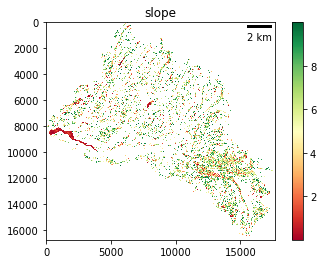

In [19]:
#Plot Masked slope
f,ax = plt.subplots()
plt.imshow(slope_mask.squeeze(), cmap='RdYlGn', interpolation='none')
plt.colorbar()
ax.set_title('slope')
ax.add_artist(ScaleBar(1));

### TRI, Roughness, Hillshade Plots

In [ ]:
src_tri = rio.open(tri_fn)
tri = src_tri.read()
tri[tri == (-9999.)] = np.nan
tri[tri == (0.)] = np.nan
src_tri.close

#Plot full range
f,ax = plt.subplots()
plt.imshow(tri.squeeze(), cmap='inferno', interpolation='none', vmin=0, vmax=10)
plt.colorbar()
ax.set_title('TRI')
ax.add_artist(ScaleBar(1));

In [ ]:
src_roughness = rio.open(roughness_fn)
roughness = src_roughness.read()
roughness[roughness == (-9999.)] = np.nan
roughness[roughness == (0.)] = np.nan
src_roughness.close

#Plot full range
f,ax = plt.subplots()
plt.imshow(roughness.squeeze(), cmap='inferno', interpolation='none')
plt.colorbar()
ax.set_title('Roughness')
ax.add_artist(ScaleBar(1));

In [ ]:
src_hs = rio.open(hs_fn)
hs = src_hs.read()
hs[hs == (-9999.)] = np.nan
hs[hs == (-0.)] = np.nan
src_hs.close

#Plot full range
f,ax = plt.subplots()
plt.imshow(hs.squeeze(), cmap='gray', interpolation='none')
plt.colorbar()
ax.set_title('Hillshade')
ax.add_artist(ScaleBar(1));